## TP NOTE 1 : REGRESSION LINEAIRE

## Exercice 1

In [322]:
%matplotlib notebook
import math                         # import a package
import numpy as np                  # import a package with specified name
from sklearn import linear_model    # import whole module
from os import mkdir, rmdir, path   # import a function
from inspect import getsourcelines  # get function source code
import random
import string
import time
import pandas as pd
import urllib
import zipfile
import matplotlib.pyplot as plt     # for plots
import seaborn as sns               # for plots
import sys
from sklearn.linear_model import LinearRegression

**1. Import de la base de données "invest.txt"**

In [350]:
df = pd.read_csv('./invest.txt',sep=" ")
df[0:6:]

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50
5,1973,1326.4,229.8,105.75,6.44


**2. Graphe PNB en fonction de l'investissement en échelle logarithmique**

<IPython.core.display.Javascript object>


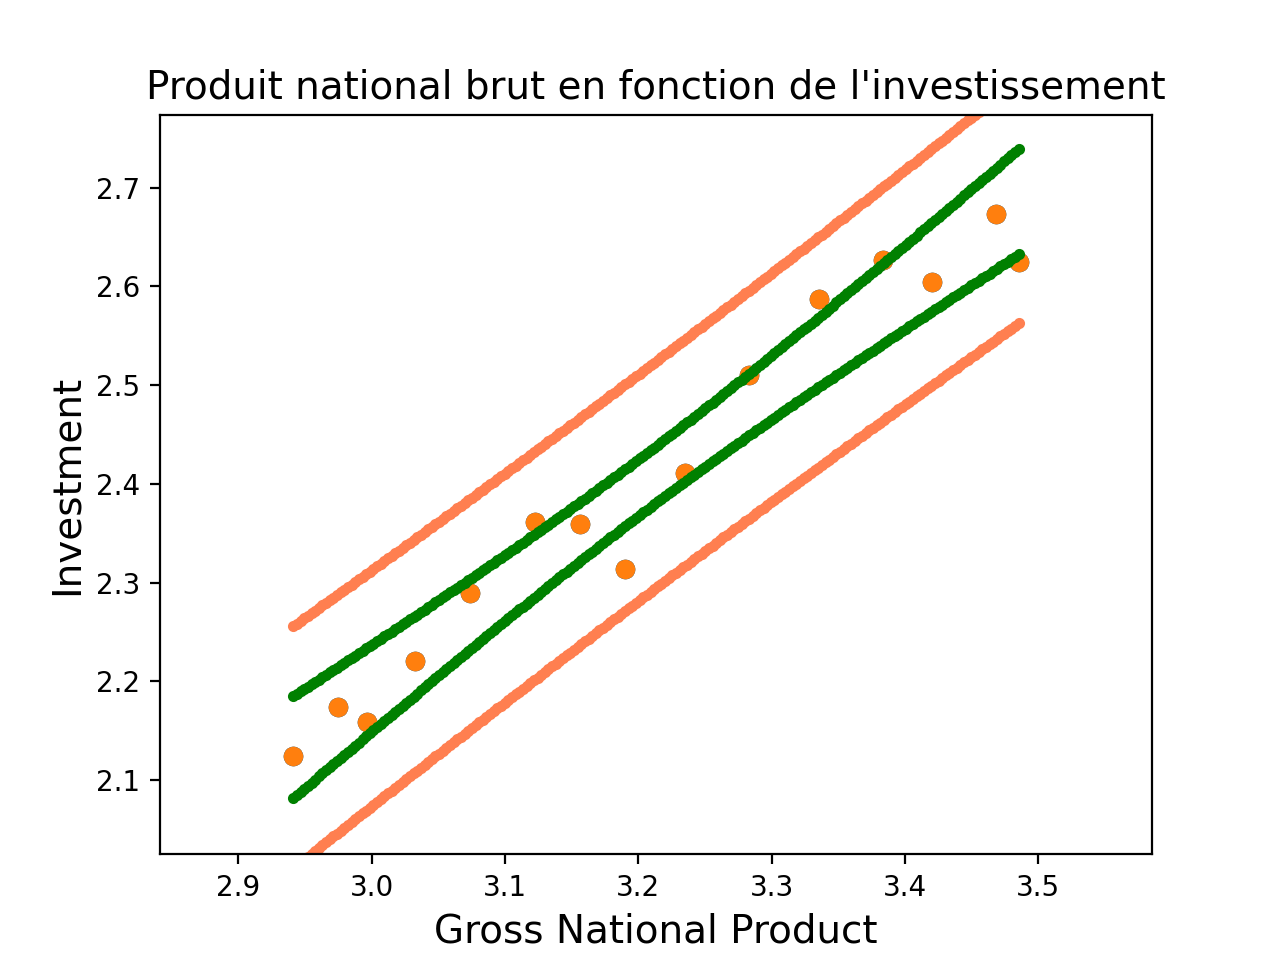

In [351]:
plt.figure()

# on met les variables sous forme logarithmique
df['log_invest']=np.log10(df['invest'])
Output = np.array(df['log_invest'])
df['log_gnp']=np.log10(df['gnp'])
Input = np.array(df['log_gnp'])

# on représente
plt.scatter(Input,Output)
plt.plot(Input, Output, 'o',label="")

# on ajuste les axes
plt.ylim([(df['log_invest'].min()-0.1), (df['log_invest'].max()+0.1)])
plt.xlim([(df['log_gnp'].min()-0.1), (df['log_gnp'].max()+0.1)])

# on met les légendes
plt.ylabel('Investment (log)', fontsize=14)
plt.xlabel('Gross National Product (log)', fontsize=14)
plt.title("Investissement en fonction du produit national brut", fontsize = 14)
plt.show()


**3. Régression de "Investment" sur "GNP"**

In [352]:
# Calcul de la moyenne sans utiliser de librairie
def moyenne(x):
    m = 0
    n = df.shape[0]
    for i in range(n) :
        m = m + x[i]
    return m/n

In [353]:
# Calcul de l'écart-type
def ecart_type(x) :
    v = 0
    n = len(x)
    for i in range(n) :
        v = v + (x[i]-moyenne(x))**2
    return math.sqrt(v/n)

In [354]:
# Calcul de la pente
def slope(y, x) :
    a = 0
    b = 0
    p = 0
    m_x = moyenne(x)
    m_y = moyenne(y)
    n = len(y)
    for i in range(n):
        a = a + (x[i] - m_x)*(y[i] - m_y)
        b = b + (x[i] - m_x)**2
    p = a/b
    return p

In [355]:
# Calcul de l'intercept
def intercept(y, x):
    p = slope(y, x)
    return moyenne(y) - p * moyenne(x)

In [356]:
# Définition des paramètres
def pm(y, x):
    return [intercept(y, x), slope(y, x)]

In [357]:
# Calcul du coefficient de détermination
def coeff_deter(y, x, p0, p1):
    a = 0
    b = 0
    m_y = moyenne(y)
    n = len(y)
    for i in range(n) :
        a = a + (y[i] - p1 * x[i] - p0)**2
        b = b + (y[i] - m_y)**2
    r2 = 1 - a/b
    return r2

In [358]:
# Application des paramètres au modèle
param = pm(Output, Input)

# Applications numériques

Invest_mean = moyenne(Output)
GNP_mean = moyenne(Input)
Invest_std = ecart_type(Output)
GNP_std = ecart_type(Input)
pente = slope(Output, Input)
intercept = Invest_mean - pente*GNP_mean
R2 = coeff_deter(Output,Input, param[0], param[1])

print ("L'investissement moyen est " + str(round(Invest_mean,2)))
print ("Le GNP moyen est " + str(round(GNP_mean,2)))
print ("L'écart-type de l'investissement est " + str(round(Invest_std,2)))
print ("L'écart-type du GNP est " + str(round(GNP_std,2)))
print ("La pente vaut " + str(round(pente, 2)))
print ("L'intercept vaut " + str(round(intercept,2)))
print ("Le coefficient de détermination vaut " + str(round(R2,2)))

L'investissement moyen est 2.4
Le GNP moyen est 3.21
L'écart-type de l'investissement est 0.18
L'écart-type du GNP est 0.18
La pente vaut 1.02
L'intercept vaut -0.85
Le coefficient de détermination vaut 0.96


**4. Test sur la pente**

Pour faire le test sur la pente on reconnaît (insérer photo1 de la formule écrite proprement)

In [359]:
# Estimateur de la variance
def est_var(y, x, p0, p1) :
    n = len(x)
    s = 0
    for i in range(n):
        s = s + (y[i]- p1 * x[i] - p0)**2
    return s/(n-2)

In [360]:
# Calcul de la statistique de test
def stat_stud(y, x, p0, p1) :
    n = len(x)
    T1 = p1 * math.sqrt(n) * ecart_type(x) / math.sqrt(est_var(y, x, p0, p1))
    return abs(T1)

In [361]:
# Applications numériques
stat_pente = stat_stud(Output, Input, param[0], param[1])
print ("La statistique de test pour la pente vaut " + str(round(stat_pente,3)))

La statistique de test pour la pente vaut 18.332


insérer photo 2.
On constate donc que la pente est statistiquement significative avec une p-valeur de 0,05 après comparaison dans la table de la loi de Student pour une loi à deux degrés de liberté.

**5.1. Estimation de l'investissement prédit par le modèle**

Pour cette question, le paramètre t est récupéré dans la table de la loi de Student : pour une loi à deux degrés de liberté, au niveau 90%, celà donne 2,92, intégré en dur dans le code au moment de l'application numérique.

In [362]:
# Calcul de la prédiction

def centre(x0, y, x, p0, p1):
    return x0 * p1 + p0

In [363]:
# Application numérique

predic_1000 = centre(math.log10(1000), Output, Input, param[0], param[1]) 
print ("L'investissement prédit pour un GNP de 1000 vaut " + str(round(predic_1000,4)))

L'investissement prédit pour un GNP de 1000 vaut 2.1931


**5.2. Intervalles de confiance et de prédiction pour l'investissement**

In [364]:
# Calcul de l'intervalle de confiance pour la valeur prédite

# Calcul de la précision de l'intervalle
def preciconf(x0, y, x, t, p0, p1):
    n = len(x)
    m_y = moyenne(y)
    m_x = moyenne(x)
    estvar = est_var(y, x, p0, p1)
    ecarttype = ecart_type(x)
    c = centre(x0, y, x, p0, p1)
    marge = t * math.sqrt(estvar) * math.sqrt(1/n + (x0 - m_x)**2/(n * ecarttype**2))
    return marge/c

# Calcul de la borne supérieure de l'intervalle de confiance
def interconfsup(x0, y, x, t, p0, p1):
    n = len(x)
    m_y = moyenne(y)
    m_x = moyenne(x)
    estvar = est_var(y,x, p0, p1)
    ecarttype = ecart_type(x)
    return p0 + x0 * p1 + t * math.sqrt(estvar) * math.sqrt(1/n + (x0 - m_x)**2/(n * ecarttype**2))

# Calcul de la borne inférieure de l'intervalle de confiance    
def interconfinf(x0,y, x, t, p0, p1):
    n = len(x)
    m_y = moyenne(y)
    m_x = moyenne(x)
    estvar = est_var(y,x, p0, p1)
    ecarttype = ecart_type(x)
    return p0 + x0 * p1 - t * math.sqrt(estvar) * math.sqrt(1/n + (x0 - m_x)**2/(n * ecarttype**2))

In [365]:
# Calcul de l'intervalle de prédiction

# Calcul de la précision de l'intervalle
def precipred(x0, y, x, t, p0, p1):
    n = len(x)
    m_y = moyenne(y)
    m_x = moyenne(x)
    estvar = est_var(y,x, p0, p1)
    ecarttype = ecart_type(x)
    c = centre(x0, y, x, p0, p1)
    marge = t * math.sqrt(estvar) * math.sqrt(1 + 1/n + (x0 - m_x)**2/(n * ecarttype**2))
    return marge/c

# Calcul de la borne supérieure de l'intervalle de prédiction
def interpredsup(x0, y, x, t, p0, p1):
    n = len(x)
    m_y = moyenne(y)
    m_x = moyenne(x)
    estvar = est_var(y,x, p0, p1)
    ecarttype = ecart_type(x)
    return p0 + x0 * p1 + t * math.sqrt(estvar) * math.sqrt(1 + 1/n + (x0 - m_x)**2/(n * ecarttype**2))
    
# Calcul de la borne inférieure de l'intervalle de prédiction    
def interpredinf(x0, y, x, t, p0, p1):
    n = len(x)
    m_y = moyenne(y)
    m_x = moyenne(x)
    estvar = est_var(y,x, p0, p1)
    ecarttype = ecart_type(x)
    return p0 + x0 * p1 - t * math.sqrt(estvar) * math.sqrt(1 + 1/n + (x0 - m_x)**2/(n * ecarttype**2))

In [366]:
# Applications numériques
supc = interconfsup(3, Output, Input, 2.92, param[0], param[1])
infc = interconfinf(3, Output, Input, 2.92, param[0], param[1])
centerc = centre(3, Output, Input, param[0], param[1])
accurc = preciconf(3, Output, Input, 2.92, param[0], param[1])
print ("L'intervalle de confiance pour un GNP de 1000 est compris entre {} et {}".format(str(round(infc,6)), str(round(supc,6))))
# Autre façon de le dire
print ("L'intervalle de confiance pour un GNP de 1000 est centré sur {} à {} près".format(str(round(centerc,6)), str(round(accurc,6))))

L'intervalle de confiance pour un GNP de 1000 est compris entre 2.149027 et 2.237108
L'intervalle de confiance pour un GNP de 1000 est centré sur 2.193067 à 0.020082 près


In [367]:
# Applications numériques
supp = interpredsup(3, Output, Input, 2.92, param[0], param[1])
infp = interpredinf(3, Output, Input, 2.92, param[0], param[1])
centerp = centre(3, Output, Input, param[0], param[1])
accurp = precipred(3, Output, Input, 2.92, param[0], param[1])
print ("L'intervalle de prédiction pour un GNP de 1000 est compris entre {} et {}".format(str(round(infp,6)), str(round(supp,6))))
print ("L'intervalle de prédiction pour un GNP de 1000 est centré sur {} à {} près".format(str(round(centerp,6)), str(round(accurp,6))))

L'intervalle de prédiction pour un GNP de 1000 est compris entre 2.07355 et 2.312585
L'intervalle de prédiction pour un GNP de 1000 est centré sur 2.193067 à 0.054498 près


**6. Représentation graphique**

In [368]:
# Construction de la liste des bornes supérieures de l'intervalle de confiance sur la plage de données pour représenter CI+
def confsup (z, y, x, t, p0, p1):
    n = len(z)
    cfs = []
    for i in range(n):
        cfs.append(interconfsup(z[i], y, x, t, p0, p1))
    return cfs
    
# Construction de la liste des bornes inférieures de l'intervalle de confiance sur la plage de données pour représenter CI-
def confinf (z, y, x, t, p0, p1):
    n = len(z)
    cfi = []
    for i in range(n):
        cfi.append(interconfinf(z[i], y, x, t, p0, p1))
    return cfi

# Construction de la liste des bornes supérieures de l'intervalle de prédiction sur la plage de données pour représenter CP+
def predsup (z, y, x, t, p0, p1):
    n = len(z)
    cps = []
    for i in range(n):
        cps.append(interpredsup(z[i], y, x, t, p0, p1))
    return cps

# Construction de la liste des bornes inférieures de l'intervalle de prédiction sur la plage de données pour représenter CP-
def predinf (z, y, x, t, p0, p1):
    n = len(z)
    cpi = []
    for i in range(n):
        cpi.append(interpredinf(z[i], y, x, t, p0, p1))
    return cpi

In [369]:
# on représente
Xabs = np.linspace(np.min(Input), np.max(Input),200)
cfs = confsup(Xabs, Output, Input, 2.92, param[0], param[1])
cfi = confinf(Xabs, Output, Input, 2.92, param[0], param[1])
cps = predsup(Xabs, Output, Input, 2.92, param[0], param[1])
cpi = predinf(Xabs, Output, Input, 2.92, param[0], param[1])

plt.scatter(Input,Output)
plt.plot(Input, Output, 'o',label="")
plt.plot(Xabs, cfs, '.', label="", color = 'green')
plt.plot(Xabs, cfi, '.', label="", color = 'green')
plt.plot(Xabs, cps, '.', label="", color = 'coral')
plt.plot(Xabs, cpi, '.', label="", color = 'coral')

# on ajuste les axes
plt.ylim([(df['log_invest'].min()-0.1), (df['log_invest'].max()+0.1)])
plt.xlim([(df['log_gnp'].min()-0.1), (df['log_gnp'].max()+0.1)])

# on met les légendes
plt.ylabel('Investment', fontsize=14)
plt.xlabel('Gross National Product', fontsize=14)
plt.title("Produit national brut en fonction de l'investissement", fontsize = 14)
plt.show()

# Les courbes sont représentées sur la figure 1 à la première question de ce TP

**7. Calculs avec les libraires pour GNP = 1000**

In [373]:
print("Regression linéaire en utilisant LinearRegression de Scikit Learn\n")

# On initialise le modèle
Scikit_linReg = LinearRegression()

# On transforme le vecteur Input de ligne à colonne
Input1=np.array(Input).reshape([-1,1])

# Entraînement du modèle
Scikit_linReg.fit(Input1, Output)

# On calcule précision du modèle
precision = Scikit_linReg.score(Input1, Output)
print (f'Le coefficient de détermination vaut : {round(precision*100,3)}%' )

#prediction pour GNP=1000 (3.0)
predicsk_1000= Scikit_linReg.predict(np.array([3.0]).reshape([-1,1]))
print (f"L'investissement prédit pour un GNP de 1000 vaut : {round(prediction1000[0],3)}" )

#Affichage de la pente
Scikit_linReg.coef_
print (f'La pente de la régression vaut : {round(Scikit_linReg.coef_[0],3)}' )

#Affichage de l'intercept
Scikit_linReg.intercept_
print (f"L'intercept de la régression vaut : {round(Scikit_linReg.intercept_,3)}" )

Regression linéaire en utilisant LinearRegression de Scikit Learn

Le coefficient de détermination vaut : 96.276%
L'investissement prédit pour un GNP de 1000 vaut : 2.193
La pente de la régression vaut : 1.015
L'intercept de la régression vaut : -0.853


On retrouve bien les mêmes valeurs que précédemment.

**8. Tracé en echelle logarithmique**

<IPython.core.display.Javascript object>


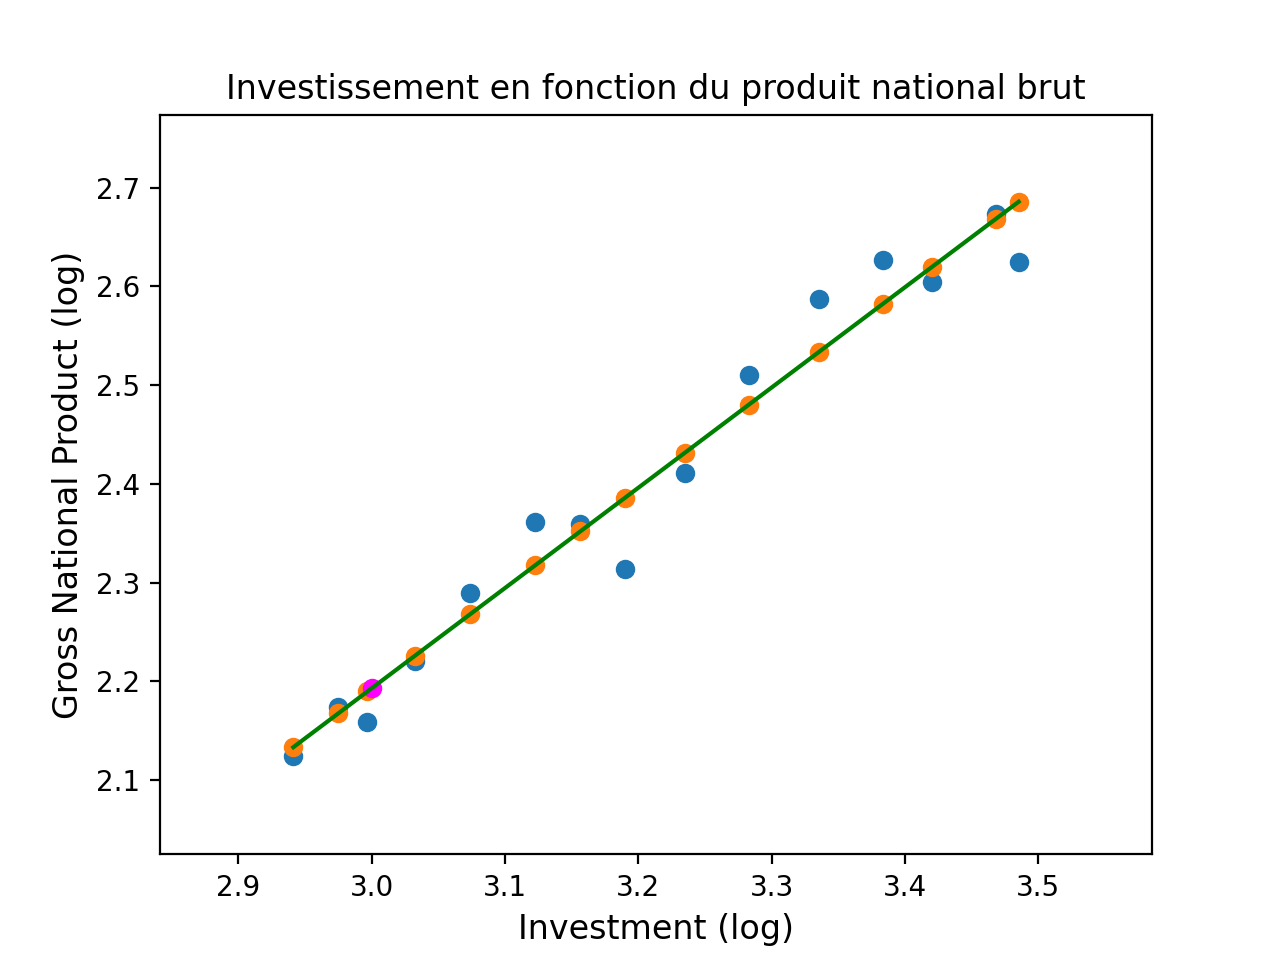

In [371]:
# On représente
Xabs = np.linspace(np.min(Input),np.max(Input),100)
predicsk = Scikit_linReg.predict(np.array(Input).reshape([-1,1]))
predicsk2 = Scikit_linReg.predict(np.array(Xabs).reshape([-1,1]))

plt.figure()
plt.scatter(Input,Output)
plt.scatter(Input,predicsk)
plt.scatter([[3.0]],Scikit_linReg.predict([[3.0]]),c='magenta')
plt.plot(Xabs,predicsk2, c = "green")

# on ajuste les axes
plt.ylim([(df['log_invest'].min()-0.1), (df['log_invest'].max()+0.1)])
plt.xlim([(df['log_gnp'].min()-0.1), (df['log_gnp'].max()+0.1)])

# On met les légendes
plt.title("Investissement en fonction du produit national brut")
plt.xlabel("Investment (log)", fontsize=12)
plt.ylabel("Gross National Product (log)", fontsize=12)


plt.show()